**NAME - PRAKHAR BHARDWAJ**

**ANDREW ID - prakharb**

**Q2** 

In [11]:
# (a)
# data preprocessing
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [12]:
data = pd.read_csv("data.csv",header=None)
print(len(data.columns)/2)
data_ = data.drop(data.index[0])
for i in range(int(len(data.columns)/2)):
    globals()['df%s' % i] = data_.iloc[:,2*i:2*(i+1)]
DF_1 = np.vstack((df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19))
names = ['TRP','ALA','TYR','PRO','HIS','THR','GLY','SER','CYS','PHE','ASP','GLU','ISO','MET','LEU','VAL','ASN','GLN' ,'ARG' ,'LYS']
DF_2 = np.repeat(names,100)
dataframe =  np.column_stack([DF_1,DF_2])    # combining the dataframes
dataframe[:,2] = pd.factorize(dataframe[:,2])[0]
dataframe[:,2] = pd.Categorical(pd.factorize(dataframe[:,2])[0])
dataframe[:,1] = dataframe[:,1].astype(float)
dataframe[:,0] = dataframe[:,0].astype(float)
dataframe[:,2] = dataframe[:,2].astype(int)
x_train, x_test, y_train, y_test = train_test_split(dataframe[:,0:2], dataframe[:,2], test_size=0.3)#, random_state=42)
y_test = y_test.astype(int)
y_train = y_train.astype(int)
x_train = x_train.astype(float)
x_test = x_test.astype(float)
np.savetxt('finaldata.csv', dataframe, delimiter=',')
print(dataframe)

20.0
[[1.46 2600.0 0]
 [21.6 2500.0 0]
 [12.6 3200.0 0]
 ...
 [73.067 1441.9 19]
 [71.311 1452.1 19]
 [70.91 1446.8 19]]


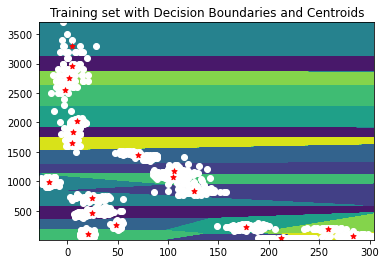

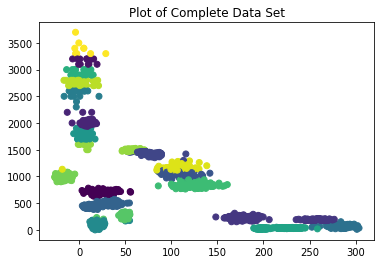

In [13]:
# (b)
# k-means
#Converting the labels to int

kmeans = KMeans(n_clusters = 20).fit(x_train)
x, y = np.meshgrid(np.arange(x_train[:, 0].min() - 1, x_train[:, 0].max() + 1, 1), np.arange(x_train[:, 1].min() - 1, x_train[:, 1].max() + 1, 1))
# xx_flat = xx.flatten()
# yy_flat = yy.flatten()
# print(xx_flat)
# print(yy_flat)
z = kmeans.predict(np.c_[x.ravel(), y.ravel()])    
Z = z.reshape(x.shape)

#Scatter Plot with decision boundary and centroids
plt.contourf(x, y, Z)
plt.scatter(x_train[:,0], x_train[:,1], c = "white")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = "red",marker='*',s = 30)
plt.title( "Training set with Decision Boundaries and Centroids" )
plt.show()

# #Plot Using Only Training Data Set
# plt.scatter(x_train[:,0],x_train[:,1], c = kmeans.labels_.astype(float))
# plt.title("Scatter Plot of Train Data")
# plt.show()

#Plot Using Entire Data
kmeans1 = KMeans(n_clusters = 20)
kmeans1.fit(dataframe)
plt.scatter(dataframe[:,0],dataframe[:,1], c = kmeans1.labels_.astype(float))
plt.title( "Plot of Complete Data Set" )
plt.show()

Accuracy of training set - 1.0

Accuracy of test set - 0.9666666666666667



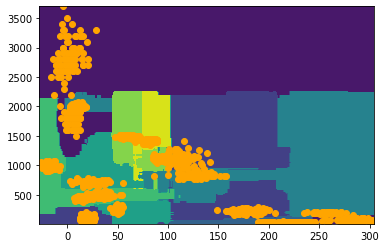

In [14]:
# (c)
# random forest

randomforest_class = RandomForestClassifier()               
randomforest_class.fit(x_train, y_train)
Y_pred = randomforest_class.predict(x_test)
train_score = randomforest_class.score(x_train, y_train)        
test_score = randomforest_class.score(x_test, y_test)
accuracy_test = randomforest_class.score(x_test, y_test)
accuracy_train = randomforest_class.score(x_train, y_train)
print(f"Accuracy of training set - {accuracy_train}")
print()
print(f"Accuracy of test set - {accuracy_test}")
print()
z1 = randomforest_class.predict(np.c_[x.ravel(), y.ravel()])    
Z1 = z1.reshape(x.shape)
plt.contourf(x, y, Z1)
plt.scatter(x_train[:,0], x_train[:,1], c = "orange")

n_estimaters =  1  Accuracy =  0.955
n_estimaters =  2  Accuracy =  0.9266666666666666
n_estimaters =  3  Accuracy =  0.95
n_estimaters =  4  Accuracy =  0.9466666666666667
n_estimaters =  5  Accuracy =  0.9566666666666667
n_estimaters =  6  Accuracy =  0.9616666666666667
n_estimaters =  7  Accuracy =  0.9666666666666667
n_estimaters =  8  Accuracy =  0.9583333333333334
n_estimaters =  9  Accuracy =  0.9583333333333334
n_estimaters =  10  Accuracy =  0.965
n_estimaters =  11  Accuracy =  0.9483333333333334
n_estimaters =  12  Accuracy =  0.9583333333333334
n_estimaters =  13  Accuracy =  0.9666666666666667
n_estimaters =  14  Accuracy =  0.955
n_estimaters =  15  Accuracy =  0.9633333333333334
n_estimaters =  16  Accuracy =  0.9583333333333334
n_estimaters =  17  Accuracy =  0.9616666666666667
n_estimaters =  18  Accuracy =  0.965
n_estimaters =  19  Accuracy =  0.955
n_estimaters =  20  Accuracy =  0.96
n_estimaters =  21  Accuracy =  0.9616666666666667
n_estimaters =  22  Accuracy = 

Text(0, 0.5, 'Accuracy')

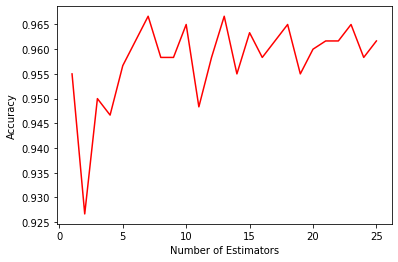

In [15]:
# (d)
testing_accuracy = []
for i in range(1,26,1):
    randomforest = RandomForestClassifier(n_estimators = i)
    randomforest.fit(x_train, y_train)
    Y_pred = randomforest.predict(x_test)
    trainscore = randomforest.score(x_train,y_train)
    testscore = randomforest.score(x_test,y_test)
    test_acc = randomforest.score(x_test,y_test)
    train_acc = randomforest.score(x_train,y_train)
    testing_accuracy.append(test_acc)
test_acc_list = np.array(testing_accuracy)
for i in range(len(test_acc_list)): 
    print("n_estimaters = ", i+1," Accuracy = ",(test_acc_list[i]))
plt.plot((np.arange(1,26,1)),test_acc_list, color = "red")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")

**2 - D**

Using this dataset and several machine learning algorithms, we can observe that:

While K-Means do not have an accuracy connected with them, the accuracy of the random forest grows with the number of estimators (trees) for the same data.
The K-means algorithm has more decision boundaries than the random forest algorithm.

Because they are nearly parallel to the X1 values, K-means decision boundaries depend more on X2 values than X1 values. For this data set, the random forest produces better clusters than K-means.